In [56]:
import graphviz
import enum
from typing import Iterable

In [57]:
not_active_members = {
    'DASHA': 'Дарья Проскурина',  # 362
    'KSENIA': 'heteroxenia',  # 1498
    'SASHA': 'Александр Антропов',  # 4080
    'SERGEY': 'Сергей Горлов',
    'MASHA_P': 'Мария Попова',  # 5975
    # 'EGOR': 'Frai Fraevich',
    
}

low_energy_members = {
    'PASHA': 'Павел Киреев',  # 6323
    'SVETA': 'Svetlana P',  # 5577
    'NATASHA': 'Nathalie Popova',  # 3069
}

medium_energy_members = {
    'TIMOSHA': 'Тимофей Горлов (Live Tim!)',  # 6650
    'MAKSIM': 'Максим Новиков',  # 8753
    'MASHA_S': 'Maria Subbotina',  # 8083
    'EVGENIA': 'Evgenia P',  # 10417
    'YAN': 'Ян Порфиров',
    'DZVON': 'dzvon_pavel',
    'DENIS': 'Denis Pukhov',  # 6412
}

high_energy_members = {
    'ANDREW': 'Andrew Popov',  # 12401
    'ALEXEY': 'Alex P',  # 13156
    'NASTYA': 'Kikky Hiro',  # 7679
    'BOROGRAAM': 'borograam',  # 36403
    'LERA': 'ler493',  # 15015
    'ELENA': 'gakel',  # 35872
}

all_names = low_energy_members.copy()
all_names.update(medium_energy_members)
all_names.update(high_energy_members)
all_names.update(not_active_members)
Names = enum.Enum('Names', all_names)
    
relations: dict[Names, list[Names]] = {}
    
relations[Names.ANDREW] = [Names.NATASHA, Names.DENIS, Names.NASTYA, Names.YAN]
relations[Names.ALEXEY] = [Names.TIMOSHA, Names.SVETA, Names.MAKSIM, Names.DZVON]
relations[Names.BOROGRAAM] = [Names.NATASHA, Names.LERA, Names.MASHA_S, Names.EVGENIA]
# relations[Names.DASHA] = [Names.SASHA, Names.MASHA_P]
relations[Names.DENIS] = [Names.ELENA, Names.DZVON, Names.SVETA, Names.ANDREW]
relations[Names.DZVON] = [Names.MAKSIM, Names.ELENA, Names.DENIS, Names.ALEXEY]
relations[Names.ELENA] = [Names.TIMOSHA, Names.SVETA, Names.DZVON, Names.DENIS]
relations[Names.EVGENIA] = [Names.SVETA, Names.BOROGRAAM, Names.LERA, Names.MAKSIM]
# relations[Names.KSENIA] = [Names.SASHA]
relations[Names.LERA] = [Names.EVGENIA, Names.MAKSIM, Names.NASTYA, Names.BOROGRAAM]
relations[Names.MAKSIM] = [Names.LERA, Names.EVGENIA, Names.ALEXEY, Names.DZVON]
# relations[Names.MASHA_P] = [Names.DASHA]
relations[Names.MASHA_S] = [Names.YAN, Names.NATASHA, Names.TIMOSHA, Names.BOROGRAAM]
relations[Names.NASTYA] = [Names.LERA, Names.YAN, Names.NATASHA, Names.ANDREW]
relations[Names.NATASHA] = [Names.ANDREW, Names.NASTYA, Names.MASHA_S, Names.BOROGRAAM]
relations[Names.PASHA] = []
# relations[Names.SASHA] = [Names.PASHA, Names.DASHA, Names.KSENIA]
relations[Names.SVETA] = [Names.EVGENIA, Names.ALEXEY, Names.ELENA, Names.DENIS]
relations[Names.TIMOSHA] = [Names.MASHA_S, Names.ALEXEY, Names.YAN, Names.ELENA]
relations[Names.YAN] = [Names.ANDREW, Names.MASHA_S, Names.NASTYA, Names.TIMOSHA]


In [58]:
relations: dict[Names, set[Names]] = {name: set(lst) for name, lst in relations.items()}

edges: set[tuple[str, str]] = set()
for name_from, name_to_list in relations.items():
    for name_to in name_to_list:
        edge = (name_from.value, name_to.value)
        edge = tuple(sorted(edge))
        edges.add(edge)

        relations[name_to].add(name_from)

def get_energy_of_members(members: Iterable[Names]) -> str:
    energy_mapping: dict[set[str], str] = {
        frozenset(low_energy_members): '',
        frozenset(medium_energy_members): '±',
        frozenset(high_energy_members): '+',
    }
    
    def members_to_signs():
        for member in members:
            for names, sign in energy_mapping.items():
                if member.name in names:
                    yield sign
                    break
                    
    return ''.join(sorted(members_to_signs()))

In [59]:
def make_graph(
        relations: dict[Names, set[Names]], 
        edges: set[tuple[str, str]],
        engine: str = 'dot',
        add_signes: bool = False
) -> graphviz.Graph:
    g = graphviz.Graph('Walkr mostik', filename='bridge_graph', format='png', engine='dot')  # sfdp circo dot
    
    for name_from, names_to in relations.items():
        green_color = {'style': 'filled', 'fillcolor': '#bef574'}
        red_color = {'style': 'filled', 'fillcolor': '#fd7c6e'}

        if add_signes:
            caption = f'{name_from.value} {get_energy_of_members(names_to)}'
        else:
            caption = name_from.value
        
        if len(names_to) == 4:
            g.node(name_from.value, caption, **green_color)
        elif len(names_to) > 4:
            g.node(name_from.value, caption, **red_color)
        else:
            g.node(name_from.value, caption)
    
    for edge in edges:
        g.edge(*edge)

    return g

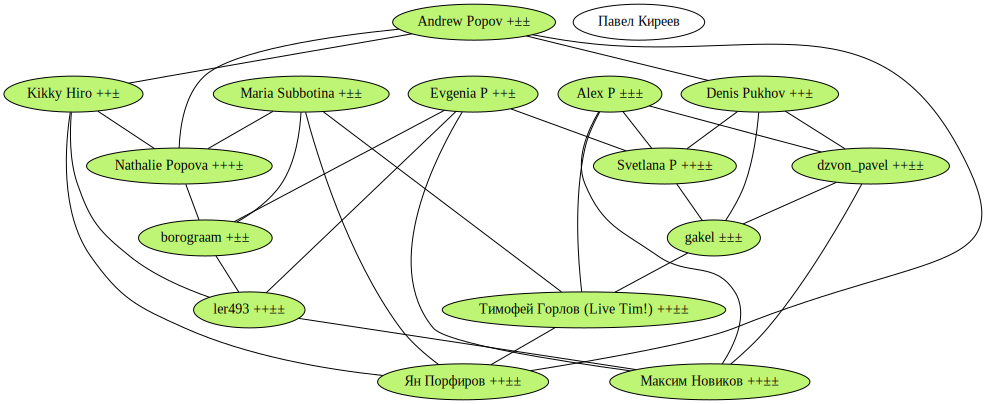

In [60]:
make_graph(relations, edges).render()
!rm bridge_graph
make_graph(relations, edges, add_signes=True)